<a href="https://colab.research.google.com/github/Shahwar-shk/NIDS/blob/main/NIDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Train_data.csv to Train_data.csv


In [ ]:
dataset = pd.read_csv("Train_data.csv")
print("Training data has {} rows & {} columns".format(dataset.shape[0],dataset.shape[1]))
dataset.head()

Training data has 25192 rows & 42 columns


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [ ]:
X = dataset.drop("class", axis=1)
Y = dataset["class"]
# print(X)
X.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0,udp,other,SF,146,0,0,0,0,0,...,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0,tcp,private,S0,0,0,0,0,0,0,...,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,0,tcp,http,SF,232,8153,0,0,0,0,...,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [ ]:
X.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0,udp,other,SF,146,0,0,0,0,0,...,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0,tcp,private,S0,0,0,0,0,0,0,...,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,0,tcp,http,SF,232,8153,0,0,0,0,...,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [ ]:
print(X['is_host_login'].value_counts())

0    25192
Name: is_host_login, dtype: int64


In [ ]:
print(X['num_outbound_cmds'].value_counts())

0    25192
Name: num_outbound_cmds, dtype: int64


In [ ]:
X.drop(['num_outbound_cmds','is_host_login'], axis=1, inplace=True)
# print(X)
X.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0,udp,other,SF,146,0,0,0,0,0,...,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0,tcp,private,S0,0,0,0,0,0,0,...,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,0,tcp,http,SF,232,8153,0,0,0,0,...,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')

X_object = X.select_dtypes("object")
X_int = X.select_dtypes(exclude = "object")

# To save the columns name for later use
X_columns = X_int.columns

# print (X_columns)

imputer.fit(X_int)
X_int = imputer.transform(X_int)
X_int = pd.DataFrame(X_int)
X_int.columns = X_columns

# print(X_int.columns)

X_object = X_object.fillna("unknown")
# X_object = np.array(X_object)
# print(X_object)

X = X_object.join(X_int)
# X = pd.concat([X_object, X_int], axis=1)

# print(X_int)
# X_int = np.array(X_int)
# # imputer.fit(X_int[0:5, 0:36])
# # X_int[0:5, 0:36] = imputer.transform(X_int[0:5, 0:36])
# X_int = pd.DataFrame(X_int)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   protocol_type                25192 non-null  object 
 1   service                      25192 non-null  object 
 2   flag                         25192 non-null  object 
 3   duration                     25192 non-null  float64
 4   src_bytes                    25192 non-null  float64
 5   dst_bytes                    25192 non-null  float64
 6   land                         25192 non-null  float64
 7   wrong_fragment               25192 non-null  float64
 8   urgent                       25192 non-null  float64
 9   hot                          25192 non-null  float64
 10  num_failed_logins            25192 non-null  float64
 11  logged_in                    25192 non-null  float64
 12  num_compromised              25192 non-null  float64
 13  root_shell      

In [ ]:
X.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
X.head()

,protocol_type,service,flag,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,tcp,ftp_data,SF,0.0,491.0,0.0,0.0,0.0,0.0,0.0,...,150.0,25.0,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,udp,other,SF,0.0,146.0,0.0,0.0,0.0,0.0,0.0,...,255.0,1.0,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,tcp,private,S0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,255.0,26.0,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,tcp,http,SF,0.0,232.0,8153.0,0.0,0.0,0.0,0.0,...,30.0,255.0,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,tcp,http,SF,0.0,199.0,420.0,0.0,0.0,0.0,0.0,...,255.0,255.0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


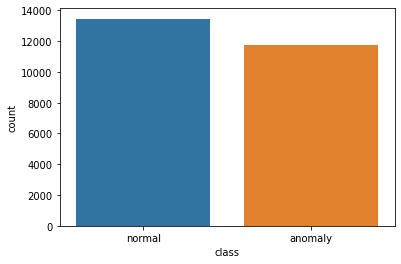

In [ ]:
import warnings
warnings.filterwarnings('ignore')
# Target Class Distribution
sns.countplot(Y)

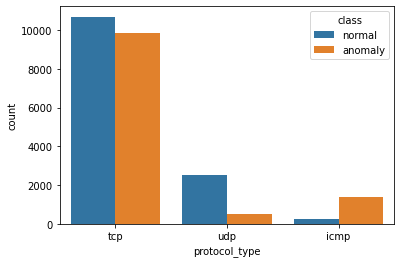

In [ ]:
sns.countplot(X['protocol_type'], hue=Y)

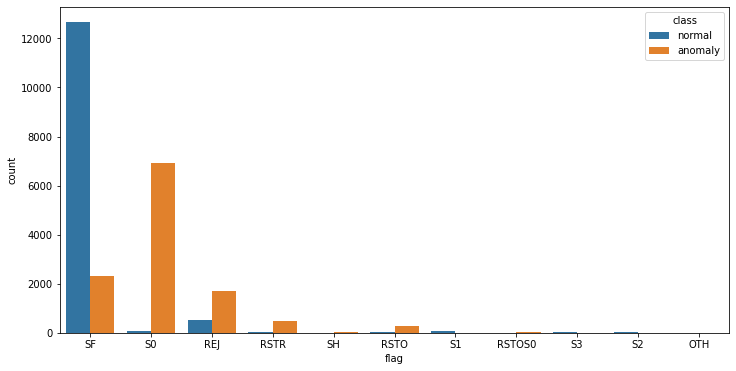

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(X['flag'], hue=Y)

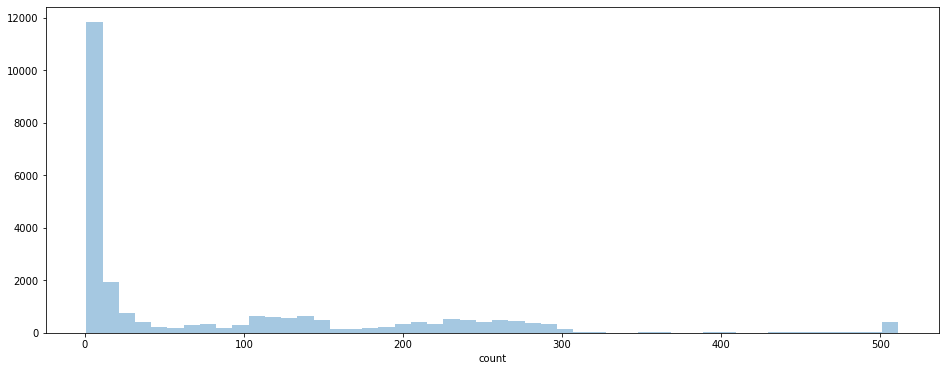

In [ ]:
plt.figure(figsize=(16,6))
sns.distplot(X['count'], kde=False)

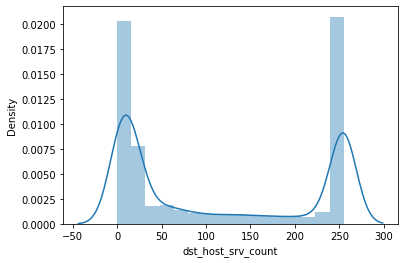

In [ ]:
sns.distplot(X.dst_host_srv_count)

In [ ]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
Y = LE.fit_transform(Y)
Y = pd.Series(Y)
Y


0        1
1        1
2        0
3        1
4        1
        ..
25187    0
25188    0
25189    0
25190    0
25191    0
Length: 25192, dtype: int64

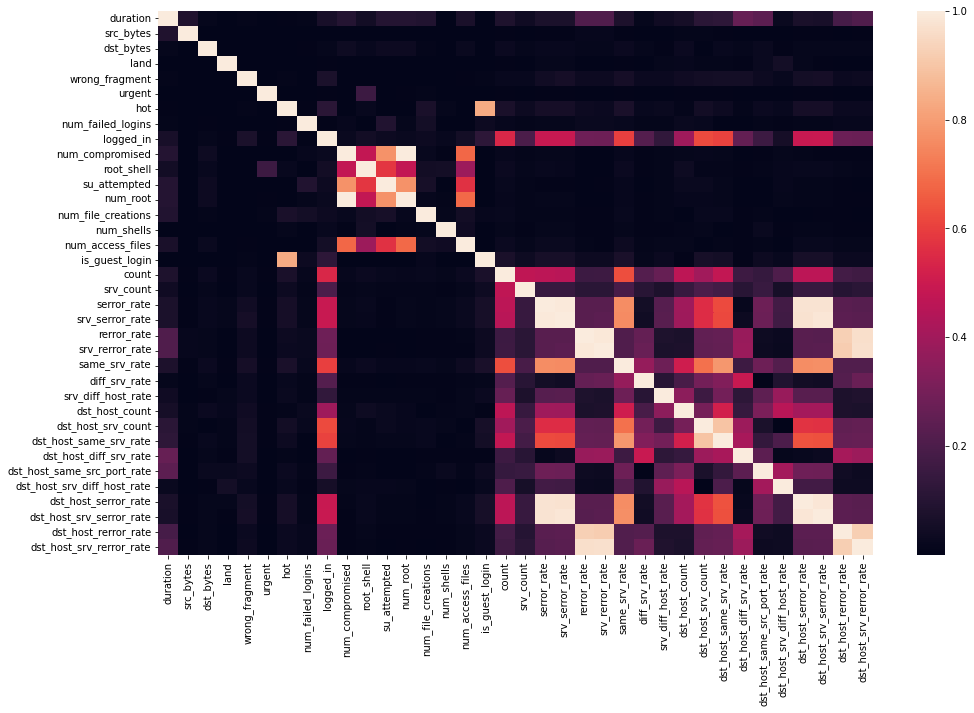

In [ ]:
plt.figure(figsize=(16,10))
sns.heatmap(X.corr().apply(abs))

In [ ]:
corr_with_target = X.corrwith(Y).apply(abs)
corr_with_target[corr_with_target>0.7]

same_srv_rate         0.749237
dst_host_srv_count    0.719292
dtype: float64

In [ ]:
class LabelEncoderExt(object):
    def __init__(self):
        self.label_encoder = LabelEncoder()

    def fit(self, data):
        self.label_encoder = self.label_encoder.fit(list(data) + ['Unknown'])
        self.classes_ = self.label_encoder.classes_
        return self

    def transform(self, data):
        new_data = list(data)
        for unique_item in np.unique(data):
            if unique_item not in self.label_encoder.classes_:
                new_data = ['Unknown' if x==unique_item else x for x in new_data]
        return self.label_encoder.transform(new_data)

In [ ]:
le = LabelEncoderExt()

# encode the selected columns
for col in X.select_dtypes("object"):
  le.fit(X[col])
  X[col] = le.transform(X[col])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [ ]:
X_train

,protocol_type,service,flag,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
741,2,47,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,255.0,1.0,0.00,0.08,0.00,0.00,1.0,1.0,0.0,0.0
411,2,17,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,255.0,4.0,0.02,0.06,0.00,0.00,0.0,0.0,1.0,1.0
17841,2,4,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,255.0,14.0,0.05,0.07,0.00,0.00,0.0,0.0,1.0,1.0
20962,1,14,9,0.0,8.0,0.0,0.0,0.0,0.0,0.0,...,2.0,152.0,1.00,0.00,1.00,0.50,0.0,0.0,0.0,0.0
17790,2,47,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,94.0,9.0,0.10,0.12,0.01,0.00,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21575,3,12,9,0.0,46.0,71.0,0.0,0.0,0.0,0.0,...,255.0,254.0,1.00,0.01,0.00,0.00,0.0,0.0,0.0,0.0
5390,2,52,9,1.0,1601.0,326.0,0.0,0.0,0.0,0.0,...,92.0,52.0,0.57,0.05,0.01,0.00,0.0,0.0,0.0,0.0
860,2,23,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,255.0,6.0,0.02,0.07,0.00,0.00,0.0,0.0,1.0,1.0
15795,2,23,9,0.0,309.0,4281.0,0.0,0.0,0.0,0.0,...,21.0,255.0,1.00,0.00,0.05,0.05,0.0,0.0,0.0,0.0


In [ ]:
X_test

,protocol_type,service,flag,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
19064,1,15,9,0.0,1032.0,0.0,0.0,0.0,0.0,0.0,...,255.0,255.0,1.00,0.00,1.00,0.00,0.0,0.00,0.00,0.00
11127,2,23,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,43.0,129.0,1.00,0.00,0.02,0.15,0.0,0.01,0.93,0.87
6517,2,47,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,255.0,3.0,0.01,0.06,0.00,0.00,1.0,1.00,0.00,0.00
2973,3,12,9,0.0,45.0,114.0,0.0,0.0,0.0,0.0,...,27.0,12.0,0.44,0.11,0.04,0.00,0.0,0.00,0.00,0.00
13339,2,23,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,12.0,12.0,1.00,0.00,0.08,0.00,1.0,1.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15322,2,47,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,255.0,9.0,0.04,0.07,0.00,0.00,0.0,0.00,1.00,1.00
24483,2,47,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,255.0,13.0,0.05,0.08,0.00,0.00,1.0,1.00,0.00,0.00
6778,3,47,9,0.0,105.0,147.0,0.0,0.0,0.0,0.0,...,255.0,249.0,0.98,0.01,0.02,0.00,0.0,0.00,0.00,0.00
9500,2,34,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,255.0,3.0,0.01,0.07,0.00,0.00,1.0,1.00,0.00,0.00


In [ ]:
y_train

741      0
411      0
17841    0
20962    0
17790    0
        ..
21575    1
5390     1
860      0
15795    1
23654    0
Length: 17634, dtype: int64

In [ ]:
y_test

19064    0
11127    1
6517     0
2973     1
13339    0
        ..
15322    0
24483    0
6778     1
9500     0
19865    0
Length: 7558, dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# store the columns
cols = X_train.columns

# transform the data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns = cols)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = cols)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier();

rfc.fit(X_train_scaled, y_train)

feature_imp = pd.DataFrame({'feature':X_train.columns,'importance':rfc.feature_importances_})
feature_imp = feature_imp.sort_values('importance',ascending=False).set_index('feature')

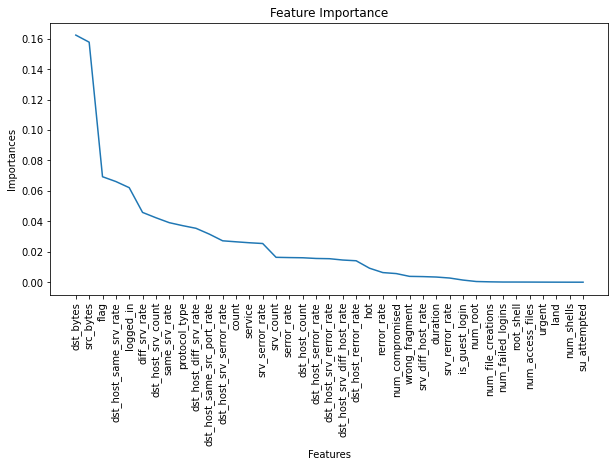

In [ ]:
plt.figure(figsize = (10, 5))
plt.title("Feature Importance")
plt.ylabel("Importances")
plt.xlabel("Features")
plt.xticks(rotation=90)
plt.plot(feature_imp)

In [ ]:
from sklearn.feature_selection import RFE
estimator = RandomForestClassifier()
selector = RFE(estimator)
selector.fit(X_train_scaled, y_train)

X_train_scaled = selector.transform(X_train_scaled)
X_test_scaled = selector.transform(X_test_scaled)

In [ ]:
SEED = 42



# LOGISTIC REGRESSION MODEL
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

# GAUSSIAN NAIVE BAYES
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()

# Train XGBOOST Classifier
from xgboost import XGBClassifier
xgbc = XGBClassifier(eval_metric="logloss", random_state=SEED)

# Train LightGBM Classifier
from lightgbm import LGBMClassifier
lgbmc = LGBMClassifier(random_state=SEED)

In [ ]:
from sklearn.model_selection import cross_val_score
models = {}

models['LogisticRegression']= lr
models['Naive Bayes Classifier']= bnb
models['XGBoost Classifier']= xgbc
models['LightGBM Classifier']= lgbmc
scores = {}
for name in models:
  scores[name]={}
  for scorer in ['precision','recall']:
    scores[name][scorer] = cross_val_score(models[name], X_train_scaled, y_train, cv=10, scoring=scorer)

In [ ]:
def line(name):
  return '*'*(25-len(name)//2)

for name in models:
  print(line(name), name, 'Model Validation', line(name))

  for scorer in ['precision','recall']:
    mean = round(np.mean(scores[name][scorer])*100,2)
    stdev = round(np.std(scores[name][scorer])*100,2)
    print ("Mean {}:".format(scorer),"\n", mean,"%", "+-",stdev)
    print()

**************** LogisticRegression Model Validation ****************
Mean precision: 
 93.47 % +- 0.97

Mean recall: 
 95.81 % +- 0.71

************** Naive Bayes Classifier Model Validation **************
Mean precision: 
 86.81 % +- 0.83

Mean recall: 
 95.77 % +- 0.63

**************** XGBoost Classifier Model Validation ****************
Mean precision: 
 99.19 % +- 0.14

Mean recall: 
 99.68 % +- 0.12

**************** LightGBM Classifier Model Validation ****************
Mean precision: 
 99.64 % +- 0.19

Mean recall: 
 99.88 % +- 0.11



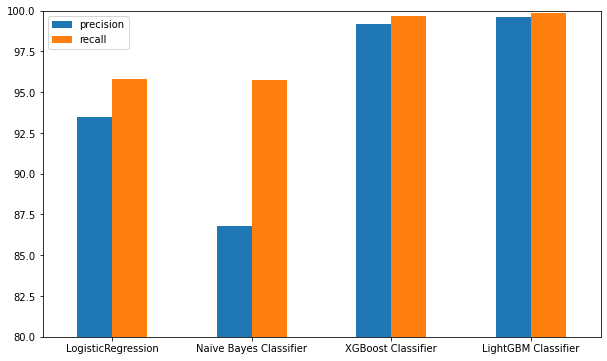

In [ ]:
for name in models:
    for scorer in ['precision','recall']:
        scores[name][scorer] = scores[name][scorer].mean()
scores=pd.DataFrame(scores).swapaxes("index", "columns")*100

scores.plot(kind = "bar",  ylim=[80,100], figsize=(10,6), rot=0)

In [ ]:
models = {}

models['LogisticRegression']= lr
models['Naive Bayes Classifier']= bnb
models['XGBoost Classifier']= xgbc
models['LightGBM Classifier']= lgbmc
preds={}
for name in models:
    models[name].fit(X_train_scaled, y_train)
    preds[name] = models[name].predict(X_test_scaled)
print("Predictions complete.")

Predictions complete.


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score
def line(name,sym="*"):
    return sym*(25-len(name)//2)
target_names=["normal","anamoly"]
for name in models:
    print(line(name), name, 'Model Testing', line(name))
    print(confusion_matrix(y_test, preds[name]))
    print(line(name,'-'))
    print(classification_report(y_test, preds[name], target_names=target_names))

**************** LogisticRegression Model Testing ****************
[[3270  246]
 [ 171 3871]]
----------------
              precision    recall  f1-score   support

      normal       0.95      0.93      0.94      3516
     anamoly       0.94      0.96      0.95      4042

    accuracy                           0.94      7558
   macro avg       0.95      0.94      0.94      7558
weighted avg       0.94      0.94      0.94      7558

************** Naive Bayes Classifier Model Testing **************
[[2981  535]
 [ 157 3885]]
--------------
              precision    recall  f1-score   support

      normal       0.95      0.85      0.90      3516
     anamoly       0.88      0.96      0.92      4042

    accuracy                           0.91      7558
   macro avg       0.91      0.90      0.91      7558
weighted avg       0.91      0.91      0.91      7558

**************** XGBoost Classifier Model Testing ****************
[[3488   28]
 [  10 4032]]
----------------
              p